In [1]:
import rawgribcodec
from kerchunk.combine import MultiZarrToZarr

In [2]:
#%xmode verbose

In [28]:
mzz = MultiZarrToZarr(
    "test_out/*.json",
    remote_protocol="file",
    xarray_open_kwargs={
        #"preprocess": drop_coords,
        "decode_cf": False,
        "mask_and_scale": False,
        "decode_times": False,
        "decode_timedelta": False,
        "use_cftime": False,
        "decode_coords": False
    },
    xarray_concat_args={
        "dim": "time",
    }
)

mzz.translate("mzz.json")

In [8]:
# optional, to access data in parallel using dask
# doesn't seem to be faster for now, but may well depend on system configuration

from dask.distributed import Client
client = Client()
client.run(rawgribcodec.register)  # registers the codec on all clients
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /user/m300827/preset//proxy/8787/status,
Dashboard: /user/m300827/preset//proxy/8787/status,Workers: 4
Total threads: 8,Total memory: 20.78 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38443,Workers: 4
Dashboard: /user/m300827/preset//proxy/8787/status,Total threads: 8
Started: Just now,Total memory: 20.78 GiB
Comm: tcp://127.0.0.1:36108,Total threads: 2
Dashboard: /user/m300827/preset//proxy/40919/status,Memory: 5.20 GiB
Nanny: tcp://127.0.0.1:38864,


In [48]:
import xarray as xr

In [50]:
ds = xr.open_zarr("reference::mzz.json", consolidated=False)
ds

<xarray.Dataset>
Dimensions:  (time: 7249, values: 20971520)
Coordinates:
  * time     (time) datetime64[us] 2020-04-02 2020-04-02T00:30:00 ... 2020-10-01
Dimensions without coordinates: values
Data variables: (12/20)
    albedo   (time, values) float64 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
    clivi    (time, values) float64 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
    cllvi    (time, values) float64 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
    clt      (time, values) float64 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
    cosmu0   (time, values) float64 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
    dew2     (time, values) float64 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
    ...       ...
    sic      (time, values) float64 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
    sit      (time, values) float64 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
    tas      (time, values) float64 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
    ts       (time, values) float64 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
    uas      (time, values) float64 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
    vas      (time, values) float64 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
Attributes:
    centre:             mpim
    centreDescription:  Max Planck Institute for Meteorology 
    edition:            2
    subCentre:          3

In [20]:
%matplotlib inline
import matplotlib.pylab as plt

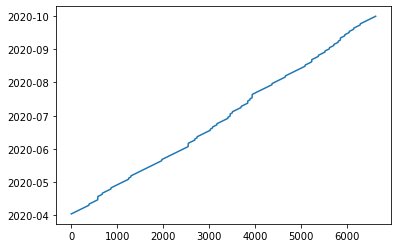

In [21]:
plt.plot(ds.time.values)

CPU times: user 5.91 s, sys: 462 ms, total: 6.37 s
Wall time: 24.9 s


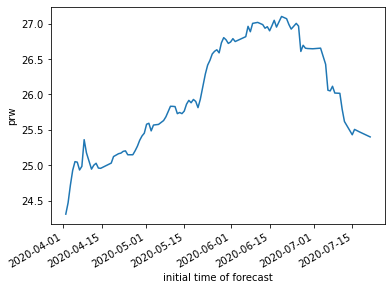

In [27]:
%%time
ds.prw.isel(time=slice(0, 4000, 40)).mean("values").load().plot()